In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg


%matplotlib inline

In [4]:
df=pd.read_csv('user2_data.csv')
df.drop(['ttime','pm1','pm2','am','lum','temp','humd','pres'],axis=1,inplace=True)

#df.columns = df.columns[[0]].tolist() + list(range(1,2))
s = df.melt('sm')
s.head()

,sm,variable,value
0,7463.0,pm3,0.00
1,7576.0,pm3,0.00
2,7576.0,pm3,0.00
3,7463.0,pm3,0.00
4,7463.0,pm3,2.51


In [5]:
s.isnull().sum()

sm          0
variable    0
value       0
dtype: int64

In [6]:
s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20166 entries, 0 to 20165
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sm        20166 non-null  float64
 1   variable  20166 non-null  object 
 2   value     20166 non-null  float64
dtypes: float64(2), object(1)
memory usage: 472.8+ KB


<AxesSubplot: >

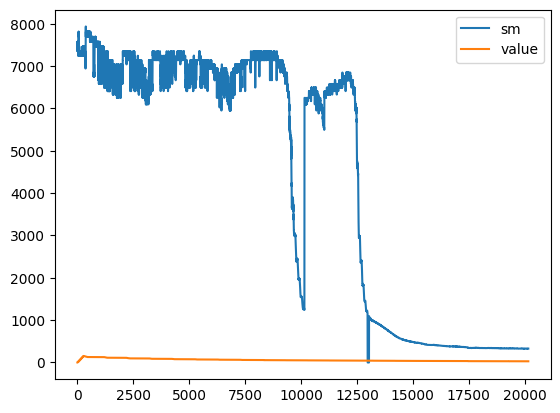

In [7]:
s.plot()

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [10]:
adf_test(s['value'])

ADF Statistics: -2.6007571323979657
p- value: 0.09284088451858502
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [11]:
## Use Techniques Differencing
s['Moisture First Difference']=s['value']-s['value'].shift(1)

In [12]:
s.head()

,sm,variable,value,Moisture First Difference
0,7463.0,pm3,0.00,NaN
1,7576.0,pm3,0.00,0.00
2,7576.0,pm3,0.00,0.00
3,7463.0,pm3,0.00,0.00
4,7463.0,pm3,2.51,2.51


In [13]:
adf_test(s['Moisture First Difference'].dropna())

ADF Statistics: -9.07368533649762
p- value: 4.2350676763739835e-15
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [14]:
## Use Techniques Differencing
s['Moisture Second Difference']=s['Moisture First Difference']-s['Moisture First Difference'].shift(1)

In [15]:
adf_test(s['Moisture Second Difference'].dropna())

ADF Statistics: -28.21558021819986
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [16]:
### 8 months 
## Use Techniques Differencing
s['Moisture 8 Difference']=s['value']-s['value'].shift(8)

In [17]:
adf_test(s['Moisture 8 Difference'].dropna())

ADF Statistics: -9.20548443052271
p- value: 1.9501285966009887e-15
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

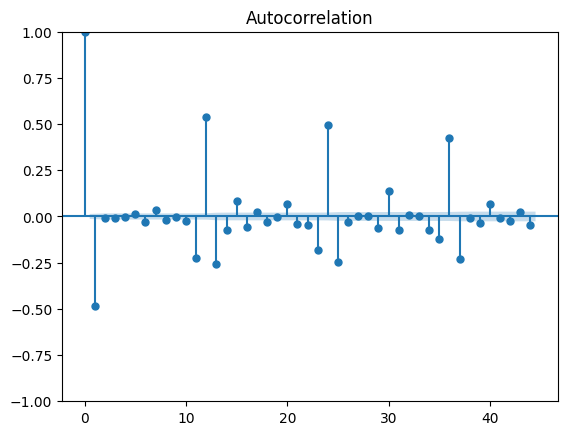

In [19]:
acf = plot_acf(s["Moisture Second Difference"].dropna())

c:\Users\sarth\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


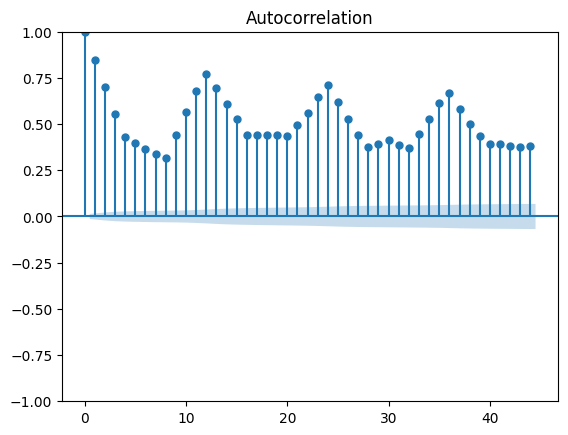

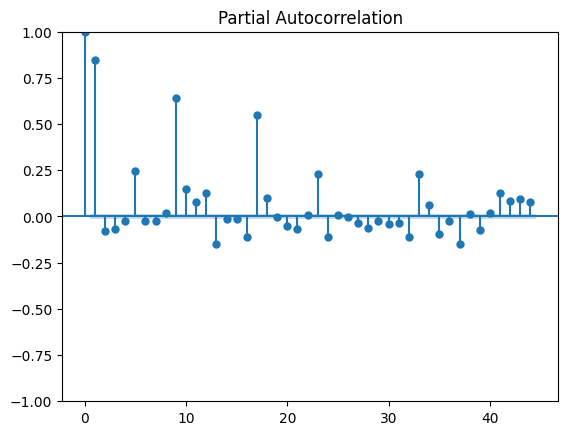

In [20]:
acf12 = plot_acf(s["Moisture 8 Difference"].dropna())
pacf12 = plot_pacf(s["Moisture 8 Difference"].dropna())

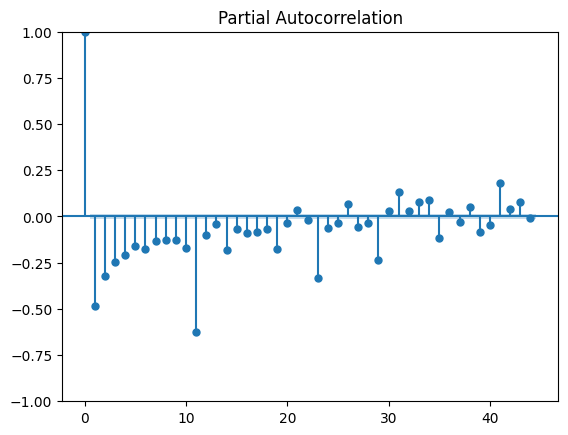

In [21]:
result = plot_pacf(s["Moisture Second Difference"].dropna())

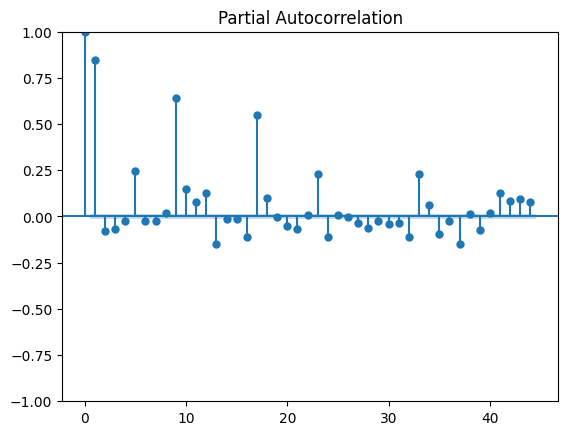

In [22]:
pacf12 = plot_pacf(s["Moisture 8 Difference"].dropna())

In [23]:
### split train and test data
s

,sm,variable,value,Moisture First Difference,Moisture Second Difference,Moisture 8 Difference
0,7463.0,pm3,0.00,NaN,NaN,NaN
1,7576.0,pm3,0.00,0.00,NaN,NaN
2,7576.0,pm3,0.00,0.00,0.00,NaN
3,7463.0,pm3,0.00,0.00,0.00,NaN
4,7463.0,pm3,2.51,2.51,2.51,NaN
...,...,...,...,...,...,...
20161,327.0,pm3,27.38,0.00,0.00,-0.55
20162,327.0,pm3,27.38,0.00,0.00,-0.55
20163,327.0,pm3,27.38,0.00,0.00,-0.55
20164,327.0,pm3,27.93,0.55,0.55,0.00


In [24]:
from datetime import datetime,timedelta
train_dataset_end=15124
test_dataset_end=20165

In [25]:
train_data=s[:train_dataset_end]
test_data=s[train_dataset_end:test_dataset_end]

In [26]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [27]:
test_data

,sm,variable,value,Moisture First Difference,Moisture Second Difference,Moisture 8 Difference
15124,469.0,pm3,37.43,0.00,0.00,-0.56
15125,469.0,pm3,37.43,0.00,0.00,-0.56
15126,468.0,pm3,37.43,0.00,0.00,-0.56
15127,468.0,pm3,37.43,0.00,0.00,0.00
15128,468.0,pm3,37.43,0.00,0.00,0.00
...,...,...,...,...,...,...
20160,326.0,pm3,27.38,0.00,0.55,-0.55
20161,327.0,pm3,27.38,0.00,0.00,-0.55
20162,327.0,pm3,27.38,0.00,0.00,-0.55
20163,327.0,pm3,27.38,0.00,0.00,-0.55


In [30]:
## create a ARIMA model
model_ARIMA = sms.tsa.arima.ARIMA(train_data['value'], order=(5,2,0))
model_Arima_fit = model_ARIMA.fit()
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                15124
Model:                 ARIMA(5, 2, 0)   Log Likelihood               -4836.782
Date:                Fri, 24 Mar 2023   AIC                           9685.564
Time:                        11:48:15   BIC                           9731.308
Sample:                             0   HQIC                          9700.735
                              - 15124                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8113      0.003   -312.870      0.000      -0.816      -0.806
ar.L2         -0.6260      0.003   -183.794      0.000      -0.633      -0.619
ar.L3         -0.4694      0.004   -122.010      0.000      -0.477      -0.462
ar.L4         -0.3222      0.004    -87.422      0.000      -0.329      -0.315
ar.L5         -0.1567      0.003    -52.449      0.000      -0.163      -0.151
sigma2         0.1110      0.000    954.593      0.000       0.111       0.111
===================================================================================
Ljung-Box (L1) (Q):                  10.76   Jarque-Bera (JB):          36352182.27
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                            11.49
Prob(H) (two-sided):                  0.00   Kurtosis:                       242.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
train_data

,sm,variable,value,Moisture First Difference,Moisture Second Difference,Moisture 8 Difference
0,7463.0,pm3,0.00,NaN,NaN,NaN
1,7576.0,pm3,0.00,0.00,NaN,NaN
2,7576.0,pm3,0.00,0.00,0.00,NaN
3,7463.0,pm3,0.00,0.00,0.00,NaN
4,7463.0,pm3,2.51,2.51,2.51,NaN
...,...,...,...,...,...,...
15119,469.0,pm3,37.43,-0.56,-0.56,-0.56
15120,469.0,pm3,37.43,0.00,0.56,-0.56
15121,469.0,pm3,37.43,0.00,0.00,-0.56
15122,469.0,pm3,37.43,0.00,0.00,-0.56


In [32]:
model_ARIMA=sms.tsa.arima.ARIMA(train_data['value'],order=(0,2,23))

In [34]:
model_Arima_fit=model_ARIMA.fit()

c:\Users\sarth\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\sarth\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [35]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  value   No. Observations:                15124
Model:                ARIMA(0, 2, 23)   Log Likelihood                 403.652
Date:                Fri, 24 Mar 2023   AIC                           -759.303
Time:                        11:54:07   BIC                           -576.330
Sample:                             0   HQIC                          -698.619
                              - 15124                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1945      0.003   -372.304      0.000      -1.201      -1.188
ma.L2          0.1323      0.006     21.347      0.000       0.120       0.144
ma.L3         -0.1189      0.008    -15.429      0.000      -0.134      -0.104
ma.L4         -0.0551      0.007     -7.835      0.000      -0.069      -0.041
ma.L5          0.1220      0.007     18.681      0.000       0.109       0.135
ma.L6          0.1285      0.008     16.739      0.000       0.113       0.144
ma.L7          0.0124      0.007      1.810      0.070      -0.001       0.026
ma.L8          0.0682      0.005     13.132      0.000       0.058       0.078
ma.L9         -0.0953      0.005    -19.079      0.000      -0.105      -0.085
ma.L10        -0.0525      0.006     -8.841      0.000      -0.064      -0.041
ma.L11         0.1467      0.006     24.401      0.000       0.135       0.159
ma.L12         0.3483      0.003    101.552      0.000       0.342       0.355
ma.L13        -0.4951      0.005   -104.653      0.000      -0.504      -0.486
ma.L14         0.1739      0.005     32.376      0.000       0.163       0.184
ma.L15        -0.1326      0.006    -21.249      0.000      -0.145      -0.120
ma.L16        -0.2100      0.006    -34.717      0.000      -0.222      -0.198
ma.L17         0.1714      0.006     30.381      0.000       0.160       0.182
ma.L18        -0.0479      0.007     -7.279      0.000      -0.061      -0.035
ma.L19         0.2262      0.006     37.092      0.000       0.214       0.238
ma.L20         0.1572      0.005     28.693      0.000       0.146       0.168
ma.L21        -0.2928      0.005    -54.425      0.000      -0.303      -0.282
ma.L22        -0.0765      0.007    -10.788      0.000      -0.090      -0.063
ma.L23         0.1129      0.005     24.564      0.000       0.104       0.122
sigma2         0.0554      0.000    351.296      0.000       0.055       0.056
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):           5693531.21
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                             4.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        97.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
test_data

,sm,variable,value,Moisture First Difference,Moisture Second Difference,Moisture 8 Difference
15124,469.0,pm3,37.43,0.00,0.00,-0.56
15125,469.0,pm3,37.43,0.00,0.00,-0.56
15126,468.0,pm3,37.43,0.00,0.00,-0.56
15127,468.0,pm3,37.43,0.00,0.00,0.00
15128,468.0,pm3,37.43,0.00,0.00,0.00
...,...,...,...,...,...,...
20160,326.0,pm3,27.38,0.00,0.55,-0.55
20161,327.0,pm3,27.38,0.00,0.00,-0.55
20162,327.0,pm3,27.38,0.00,0.00,-0.55
20163,327.0,pm3,27.38,0.00,0.00,-0.55


In [38]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['value']-pred

In [39]:
pred

15124     37.484285
15125     37.564775
15126     37.619121
15127     37.564508
15128     37.551099
            ...    
20160   -123.249469
20161   -123.281404
20162   -123.313339
20163   -123.345274
20164   -123.377209
Name: predicted_mean, Length: 5041, dtype: float64

In [40]:
residuals

15124     -0.054285
15125     -0.134775
15126     -0.189121
15127     -0.134508
15128     -0.121099
            ...    
20160    150.629469
20161    150.661404
20162    150.693339
20163    150.725274
20164    151.307209
Length: 5041, dtype: float64

<AxesSubplot: ylabel='Density'>

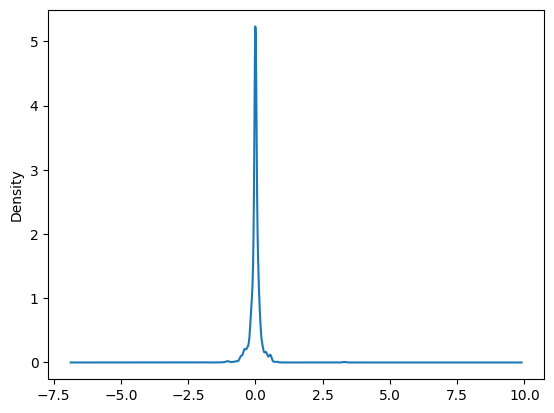

In [41]:
model_Arima_fit.resid.plot(kind='kde')

In [42]:
test_data['Predicted_ARIMA']=pred

C:\Users\sarth\AppData\Local\Temp\ipykernel_12860\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<AxesSubplot: >

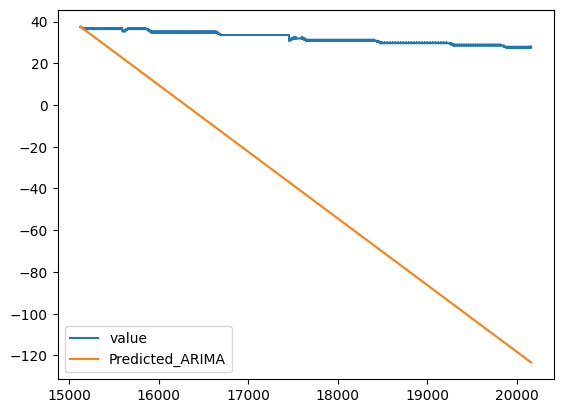

In [43]:
test_data[['value','Predicted_ARIMA']].plot()


c:\Users\sarth\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


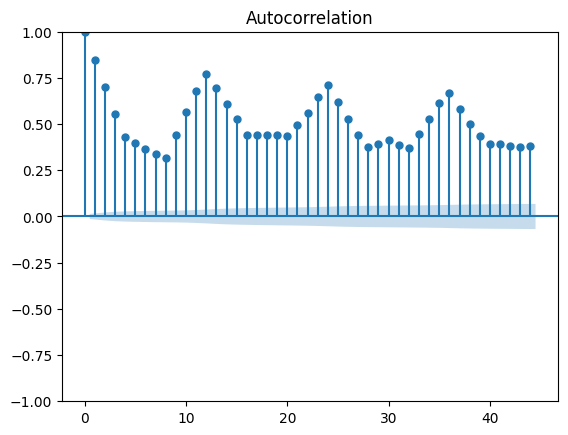

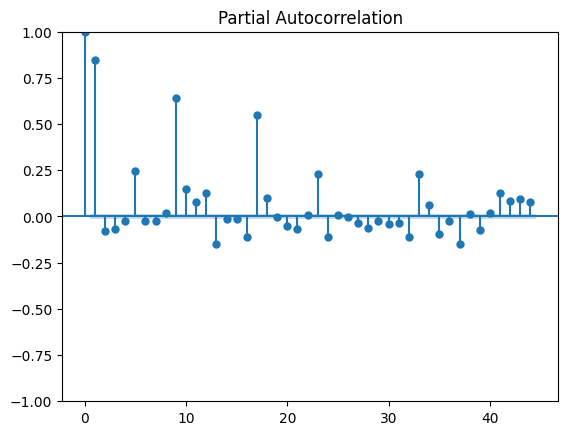

In [46]:
acf8 = plot_acf(s["Moisture 8 Difference"].dropna())
pacf8 = plot_pacf(s["Moisture 8 Difference"].dropna())

In [47]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [48]:
model_SARIMA=SARIMAX(train_data['value'],order=(1,0,3),seasonal_order=(1,1,1,12))

In [49]:
model_SARIMA_fit=model_SARIMA.fit()

c:\Users\sarth\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                value   No. Observations:                15124
Model:             SARIMAX(1, 0, 3)x(1, 1, [1], 12)   Log Likelihood                1555.436
Date:                              Fri, 24 Mar 2023   AIC                          -3096.873
Time:                                      12:02:15   BIC                          -3043.510
Sample:                                           0   HQIC                         -3079.174
                                            - 15124                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9994      0.000   7172.842      0.000       0.999       1.000
ma.L1         -0.1847      0.002   -108.120      0.000      -0.188      -0.181
ma.L2         -0.0588      0.005    -11.164      0.000      -0.069      -0.048
ma.L3         -0.1450      0.005    -31.911      0.000      -0.154      -0.136
ar.S.L12       0.0670      0.003     26.226      0.000       0.062       0.072
ma.S.L12      -0.6577      0.002   -350.032      0.000      -0.661      -0.654
sigma2         0.0477    9.2e-05    517.993      0.000       0.047       0.048
===================================================================================
Ljung-Box (L1) (Q):                   3.53   Jarque-Bera (JB):          15464402.30
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                       159.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
test_data.tail()

,sm,variable,value,Moisture First Difference,Moisture Second Difference,Moisture 8 Difference,Predicted_ARIMA
20160,326.0,pm3,27.38,0.00,0.55,-0.55,-123.249469
20161,327.0,pm3,27.38,0.00,0.00,-0.55,-123.281404
20162,327.0,pm3,27.38,0.00,0.00,-0.55,-123.313339
20163,327.0,pm3,27.38,0.00,0.00,-0.55,-123.345274
20164,327.0,pm3,27.93,0.55,0.55,0.00,-123.377209


In [55]:
pred_Sarima=model_SARIMA_fit.predict(start=15125,end=20164)
residuals=test_data['value']-pred_Sarima

<AxesSubplot: >

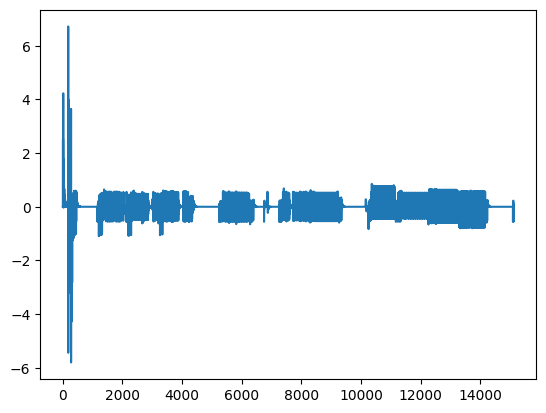

In [56]:
model_SARIMA_fit.resid.plot()

<AxesSubplot: ylabel='Density'>

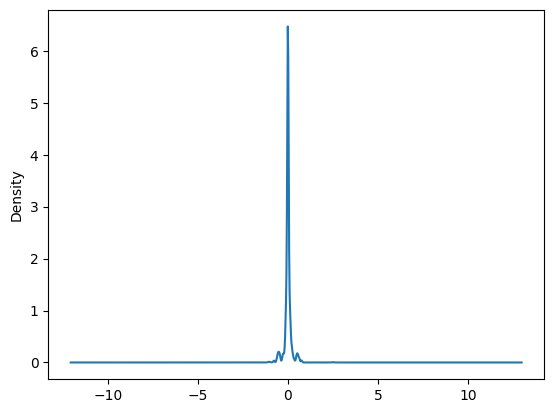

In [57]:
model_SARIMA_fit.resid.plot(kind='kde')

In [58]:
test_data['Predicted_SARIMA']=pred_Sarima

C:\Users\sarth\AppData\Local\Temp\ipykernel_12860\1367177785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred_Sarima


In [59]:
test_data

,sm,variable,value,Moisture First Difference,Moisture Second Difference,Moisture 8 Difference,Predicted_ARIMA,Predicted_SARIMA
15124,469.0,pm3,37.43,0.00,0.00,-0.56,37.484285,NaN
15125,469.0,pm3,37.43,0.00,0.00,-0.56,37.564775,37.439513
15126,468.0,pm3,37.43,0.00,0.00,-0.56,37.619121,37.428846
15127,468.0,pm3,37.43,0.00,0.00,0.00,37.564508,37.429333
15128,468.0,pm3,37.43,0.00,0.00,0.00,37.551099,37.429820
...,...,...,...,...,...,...,...,...
20160,326.0,pm3,27.38,0.00,0.55,-0.55,-123.249469,1.551191
20161,327.0,pm3,27.38,0.00,0.00,-0.55,-123.281404,1.573990
20162,327.0,pm3,27.38,0.00,0.00,-0.55,-123.313339,1.596775
20163,327.0,pm3,27.38,0.00,0.00,-0.55,-123.345274,1.539726


<AxesSubplot: >

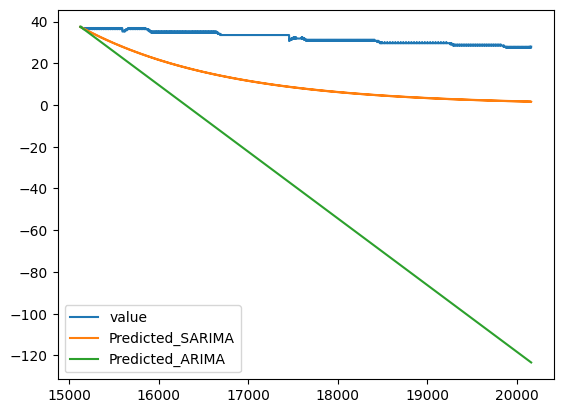

In [60]:
test_data[['value','Predicted_SARIMA','Predicted_ARIMA']].plot()

In [63]:
model2 = SARIMAX(train_data['value'],order=(1,0,3),seasonal_order=(1,1,1,8))
result2 = model2.fit()
s.tail()
future_pred=pd.date_range(start='2022-07-18',end='2023-03-31')
pred2=result2.predict(start=len(s),end=len(s)+35,typ='levels')

c:\Users\sarth\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
pred2.to_csv('pred.csv')
pred2

20166   -28.859059
20167   -28.922962
20168   -28.919394
20169   -28.915826
20170   -28.912258
20171   -28.962501
20172   -28.958179
20173   -28.953522
20174   -28.950942
20175   -29.014840
20176   -29.011267
20177   -29.007694
20178   -29.004122
20179   -29.054359
20180   -29.050032
20181   -29.045371
20182   -29.042785
20183   -29.106679
20184   -29.103101
20185   -29.099523
20186   -29.095946
20187   -29.146178
20188   -29.141847
20189   -29.137180
20190   -29.134590
20191   -29.198479
20192   -29.194896
20193   -29.191313
20194   -29.187731
20195   -29.237959
20196   -29.233622
20197   -29.228951
20198   -29.226356
20199   -29.290240
20200   -29.286652
20201   -29.283065
Name: predicted_mean, dtype: float64

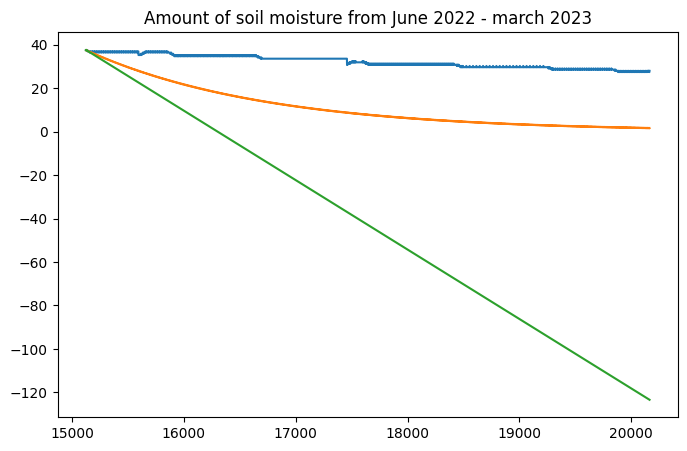

In [68]:
# test_data['SARIMA_pred']=pred2
plt.rcParams['figure.figsize'] = [8, 5]
plt.title("Amount of soil moisture from June 2022 - march 2023")
plt.plot(test_data[['value','Predicted_SARIMA','Predicted_ARIMA']])